In [5]:
import pandas as pd

- Process:
    - I downloaded a curated database of TCR / epitope pairings. The evidence supporting the large majority of the pairings is dextramer, tetramer, or multimer sorting and then sequencing. Often this is single-cell data
    - I cross-referenced the database with the Tabula Sapiens database of TCRs that I created
- Topline Inferred Peptide Data:

    - When I do this I end up with 34 TCR Betas with exact matches in the database of TCR / epitope pairings, this order 1/100 of the TCRBs in Tabula Sapiens currently
    
    - EBV           12 peptides
    - CMV            14 peptides
    - InfluenzaA     8 peptides
    
- Cell Ontology:
    - There doesn't appear to be enrichment for a specific cell ontology class in these T cells which bind these viruses
    
- Tissue

In [7]:
# load VDJdb curated database of TCR / epitope pairings
#https://vdjdb.cdr3.net/search
tcr_db = pd.read_table('../../metadata/vdjdb.tsv')
# load summary table from Tabula Sapiens
ts_tcrs = pd.read_table('../../data/processed_data/merged_airr_scirpy2.tsv')

# subset to TCR
ts_tcrs = ts_tcrs[ts_tcrs.receptor_type == 'TCR']

# exact cdr3 matches
cdr3_hits = pd.merge(tcr_db, ts_tcrs, left_on='CDR3', right_on="IR_VDJ_1_junction_aa")

print(cdr3_hits.shape[0], "exact CDR3 matches in VDJdb")

#create table of exact tcrB matches from TS into VDJdb
tcrb_hits = cdr3_hits[(cdr3_hits['V'] == cdr3_hits['IR_VDJ_1_v_call']) & (cdr3_hits['J'] == cdr3_hits['IR_VDJ_1_j_call'])]
# drop duplicates

tcrb_hits = tcrb_hits.drop_duplicates(subset = 'cell_identifier', keep='last')

1072 exact CDR3 matches in VDJdb


In [11]:
ts_tcrs.method.value_counts()

smartseq2    3850
10X           897
Name: method, dtype: int64

In [4]:
ts_tcrs.donor.value_counts()

TSP2     2487
TSP7     1169
TSP4      263
TSP10     229
TSP11     204
TSP1      185
TSP13      70
TSP8       69
TSP3       32
TSP5       29
TSP9        5
TSP6        5
Name: donor, dtype: int64

## How many exact matching TCRB sequences are both Tabula Sapiens and the VDJdb?

In [115]:
print("exact TCRB matches from TS found in VDJdb:  ", tcrb_hits.shape[0] )
print("TS cdr3 database size:  ", ts_tcrs.IR_VDJ_1_junction_aa.dropna().shape[0])
print("VDJdb database size:  ", tcr_db.shape[0])

exact TCRB matches from TS found in VDJdb:   34
TS cdr3 database size:   3909
VDJdb database size:   73433


## What organism are these inferred binding interactions from? 

In [116]:
tcrb_hits['Epitope species'].value_counts()

CMV           14
EBV           12
InfluenzaA     8
Name: Epitope species, dtype: int64

## What are the peptides?

In [117]:
tcrb_hits['Epitope'].value_counts()

GILGFVFTL         6
KLGGALQAK         6
NLVPMVATV         5
FLRGRAYGL         4
GLCTLVAML         4
NEGVKAAW          3
RAKFKQLL          3
GLIYNRMGAVTTEV    2
AVFDRKSDAK        1
Name: Epitope, dtype: int64

GILGFVFTL is a well studied epitope known to be immunodominant for the flu Matrix protein: 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4178881/

RAKFKQLL is a well studied epitope known to show positive T cells in EBV seropositive individuals

# What genes are being targeted by these TCRBs?

In [118]:
tcrb_hits.groupby('Epitope species')['Epitope gene'].value_counts()

Epitope species  Epitope gene
CMV              IE1             6
                 pp65            5
                 IE2             3
EBV              BMLF1           4
                 EBNA3A          4
                 BZLF1           3
                 EBNA4           1
InfluenzaA       M               6
                 M1              2
Name: Epitope gene, dtype: int64

Here is a wholistic looks at the species which bind and their epitopes

# What Donors are represented and for what peptides

In [119]:
tcrb_hits.groupby(['donor', 'Epitope species']).tissue.value_counts()

donor  Epitope species  tissue        
TSP1   CMV              Muscle            3
                        Lung              2
       InfluenzaA       Muscle            2
TSP2   CMV              Muscle            3
                        Skin              1
                        Spleen            1
                        Thymus            1
       EBV              Bone_Marrow       3
                        Blood             2
                        Muscle            2
                        Kidney            1
                        Lymph_Node        1
                        Spleen            1
       InfluenzaA       Blood             1
                        Lymph_Node        1
                        Skin              1
TSP5   CMV              Eye               1
TSP7   CMV              Spleen            1
                        Tongue            1
       EBV              Tongue            2
       InfluenzaA       Salivary_Gland    1
                        Spleen       

# What are the clone sizes of these T cells?

<AxesSubplot:>

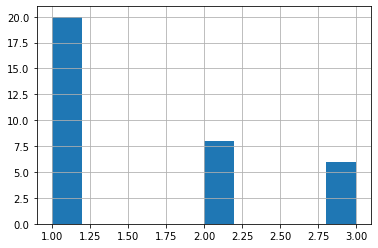

In [120]:
tcrb_hits.clone_id_size.hist()

# Are any of the t cells which are viral hits, the large clones we present in the figures?

In [121]:

tcrb_hits[tcrb_hits.clone_id.isin(ts_tcrs[ts_tcrs.clone_id_size > 5].clone_id)].tissue

Series([], Name: tissue, dtype: object)

nope

## Is There anything to say about clone, virus, and tissue?

In [122]:
tcrb_hits.groupby(['Epitope species', 'clone_id']).tissue.value_counts()

Epitope species  clone_id  tissue        
CMV              969       Thymus            1
                 2527      Muscle            2
                           Lung              1
                 2612      Lung              1
                           Muscle            1
                 2677      Eye               1
                 2789      Tongue            1
                 3686      Spleen            1
                 4366      Skin              1
                 4419      Muscle            3
                 4740      Spleen            1
EBV              3070      Tongue            1
                 3083      Tongue            1
                 4251      Muscle            1
                           Spleen            1
                 4254      Blood             2
                 4517      Bone_Marrow       1
                 4532      Bone_Marrow       1
                 4892      Kidney            1
                           Muscle            1
                 5

## What is the makeup of the VDJdb TCRB to epitope pairings? 

In [123]:
tcr_db['Epitope species'].value_counts()

CMV                          34614
InfluenzaA                   11519
EBV                          10855
HomoSapiens                   4305
SARS-CoV-2                    2834
HIV-1                         2756
SIV                           1982
MCMV                          1435
HCV                            827
YFV                            697
HTLV-1                         229
DENV1                          177
DENV3/4                        174
PlasmodiumBerghei              170
HSV-2                          152
LCMV                           137
RSV                            125
synthetic                       92
DENV2                           60
M.tuberculosis                  56
VSV                             54
TriticumAestivum                51
MusMusculus                     50
HPV                             28
GallusGallus                    16
MCPyV                           10
StreptomycesKanamyceticus        6
E.Coli                           4
ManducaSexta        

## What are the annotated cell types of these tcrb_hits

In [124]:
tcrb_hits.cell_ontology_class.value_counts()

cd8-positive, alpha-beta t cell                         12
cd4-positive, alpha-beta t cell                          5
cd8-positive, alpha-beta memory t cell                   4
immune cell                                              3
mature nk t cell                                         2
cd4-positive helper t cell                               2
t cell                                                   2
macrophage                                               1
cd4-positive, alpha-beta memory t cell                   1
thymocyte                                                1
naive thymus-derived cd4-positive, alpha-beta t cell     1
Name: cell_ontology_class, dtype: int64

### All tcrs in TS to calibrate expected values

In [125]:

ts_tcrs.cell_ontology_class.value_counts()

cd4-positive, alpha-beta t cell                                991
cd8-positive, alpha-beta t cell                                785
thymocyte                                                      482
t cell                                                         419
cd4-positive, alpha-beta memory t cell                         316
cd4-positive helper t cell                                     307
naive thymus-derived cd4-positive, alpha-beta t cell           305
cd8-positive, alpha-beta memory t cell                         287
innate lymphoid cell                                           209
immune cell                                                    166
cd4-positive alpha-beta t cell                                 101
regulatory t cell                                               54
cd8-positive alpha-beta t cell                                  47
nk cell                                                         42
mature nk t cell                                              

## Chi square test

In [126]:
import numpy as np

In [127]:
# calculate observed frequencies
f_obs = tcrb_hits.cell_ontology_class.value_counts(normalize=True)

In [128]:
# calculated expected frequencies
f_exp = ts_tcrs.cell_ontology_class.value_counts(normalize=True)

In [129]:
# put 0 frequencies in to cell ontologies that aren't seen in the hits but are observed in the TS tcr database
N = f_exp.shape[0] - f_obs.shape[0]
f_obs = np.pad(f_obs.values, (0,N), 'constant')

In [130]:
import scipy.stats as stats

In [131]:
stats.chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=0.21067402579732886, pvalue=1.0)

It's possible there is a signal here, where the hits in VDJdb are more likely to be CD8-positive, alpha-beta t cells than random. It seems like an odd claim to make given the annotations are so weird right, which violates some of the Chisquared assumptions as well as adds a bunch of df. I think a different statistical test could be done here to ask whether the viral binders are enriched for CD8-positive t cells (or any other type) but given the resounding "no" from chi-squared I'm not hopeful

In [132]:
ts_tcrs = ts_tcrs[ts_tcrs.cell_ontology_class.isin(tcrb_hits.cell_ontology_class)]

In [133]:
f_obs = tcrb_hits.cell_ontology_class.value_counts(normalize=True)
f_exp = ts_tcrs.cell_ontology_class.value_counts(normalize=True)

In [134]:
f_obs

cd8-positive, alpha-beta t cell                         0.352941
cd4-positive, alpha-beta t cell                         0.147059
cd8-positive, alpha-beta memory t cell                  0.117647
immune cell                                             0.088235
mature nk t cell                                        0.058824
cd4-positive helper t cell                              0.058824
t cell                                                  0.058824
macrophage                                              0.029412
cd4-positive, alpha-beta memory t cell                  0.029412
thymocyte                                               0.029412
naive thymus-derived cd4-positive, alpha-beta t cell    0.029412
Name: cell_ontology_class, dtype: float64

In [135]:
stats.chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=0.2071166270693902, pvalue=0.9999999089434757)

# are certain donors / tissues more or less likely to show up in this database? 

In [136]:
# number of tcrs is TS
ts_tcrs.tissue.value_counts()

Blood             688
Thymus            590
Bone_Marrow       589
Lymph_Node        502
Muscle            367
Spleen            350
Salivary_Gland    242
Tongue            166
Skin              164
Fat               101
Mammary            86
Kidney             70
Prostate           68
Eye                55
Uterus             38
Lung               26
Vasculature        13
Pancreas            5
Liver               4
Bladder             3
Trachea             1
Name: tissue, dtype: int64

In [137]:
# number of tcrs by donor
ts_tcrs.donor.value_counts()

TSP2     2413
TSP7      749
TSP4      253
TSP11     201
TSP1      165
TSP10     147
TSP8       68
TSP13      67
TSP3       28
TSP5       27
TSP9        5
TSP6        5
Name: donor, dtype: int64

In [138]:
# number of hits by donor
tcrb_hits.donor.value_counts()

TSP2    19
TSP1     7
TSP7     6
TSP8     1
TSP5     1
Name: donor, dtype: int64

In [139]:
tcrb_hits.tissue.value_counts()

Muscle            10
Spleen             4
Blood              3
Tongue             3
Bone_Marrow        3
Lung               2
Lymph_Node         2
Skin               2
Prostate           1
Thymus             1
Kidney             1
Eye                1
Salivary_Gland     1
Name: tissue, dtype: int64

# what level of evidence suports most of these hits


In [140]:
for i, s in tcrb_hits.iterrows():
    print(s.Method)

{"frequency": "", "identification": "tetramer-sort", "sequencing": "sanger", "singlecell": "", "verification": ""}
{"frequency": "", "identification": "tetramer-sort", "sequencing": "sanger", "singlecell": "", "verification": ""}
{"frequency": "21/21", "identification": "CTL clone", "sequencing": "sanger", "singlecell": "", "verification": "pentamer-sort"}
{"frequency": "21/21", "identification": "CTL clone", "sequencing": "sanger", "singlecell": "", "verification": "pentamer-sort"}
{"frequency": "21/21", "identification": "CTL clone", "sequencing": "sanger", "singlecell": "", "verification": "pentamer-sort"}
{"frequency": "21/21", "identification": "CTL clone", "sequencing": "sanger", "singlecell": "", "verification": "pentamer-sort"}
{"frequency": "16/125", "identification": "cultured-T-cells", "sequencing": "sanger", "singlecell": "", "verification": ""}
{"frequency": "16/125", "identification": "cultured-T-cells", "sequencing": "sanger", "singlecell": "", "verification": ""}
{"freq

It looks like most of the hits have good evidence

# Write out the hits and tcr merged data

In [142]:
tcrb_hits.to_csv('VDJdb_TabulaSapiens_hitsV2.tsv', sep='\t')